<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-Packages" data-toc-modified-id="Import-Packages-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import Packages</a></span></li><li><span><a href="#Read-Data" data-toc-modified-id="Read-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Read Data</a></span><ul class="toc-item"><li><span><a href="#Player-Performance" data-toc-modified-id="Player-Performance-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Player Performance</a></span></li><li><span><a href="#Team" data-toc-modified-id="Team-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Team</a></span></li><li><span><a href="#Fixtures" data-toc-modified-id="Fixtures-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Fixtures</a></span></li><li><span><a href="#Players" data-toc-modified-id="Players-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Players</a></span></li></ul></li><li><span><a href="#Settings" data-toc-modified-id="Settings-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Settings</a></span><ul class="toc-item"><li><span><a href="#Choose-Features-to-Calculate" data-toc-modified-id="Choose-Features-to-Calculate-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Choose Features to Calculate</a></span></li></ul></li><li><span><a href="#Develop-Features" data-toc-modified-id="Develop-Features-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Develop Features</a></span><ul class="toc-item"><li><span><a href="#Setup-DataFrame" data-toc-modified-id="Setup-DataFrame-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Setup DataFrame</a></span></li><li><span><a href="#Player's-Team" data-toc-modified-id="Player's-Team-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Player's Team</a></span></li><li><span><a href="#Team-Top-6" data-toc-modified-id="Team-Top-6-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Team Top 6</a></span></li><li><span><a href="#Team-Game-Number" data-toc-modified-id="Team-Game-Number-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Team Game Number</a></span></li><li><span><a href="#Player's-Position" data-toc-modified-id="Player's-Position-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Player's Position</a></span></li><li><span><a href="#Played-Previous-Game" data-toc-modified-id="Played-Previous-Game-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Played Previous Game</a></span></li><li><span><a href="#Player-Running-Totals" data-toc-modified-id="Player-Running-Totals-4.7"><span class="toc-item-num">4.7&nbsp;&nbsp;</span>Player Running Totals</a></span></li><li><span><a href="#Player-Value" data-toc-modified-id="Player-Value-4.8"><span class="toc-item-num">4.8&nbsp;&nbsp;</span>Player Value</a></span></li><li><span><a href="#Team-Points" data-toc-modified-id="Team-Points-4.9"><span class="toc-item-num">4.9&nbsp;&nbsp;</span>Team Points</a></span></li><li><span><a href="#Calculate-Form" data-toc-modified-id="Calculate-Form-4.10"><span class="toc-item-num">4.10&nbsp;&nbsp;</span>Calculate Form</a></span></li></ul></li><li><span><a href="#Data-Preview" data-toc-modified-id="Data-Preview-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Data Preview</a></span></li><li><span><a href="#Training-Models" data-toc-modified-id="Training-Models-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Training Models</a></span><ul class="toc-item"><li><span><a href="#Setup-Classification-Labels" data-toc-modified-id="Setup-Classification-Labels-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Setup Classification Labels</a></span></li><li><span><a href="#Balanced-Subsampling" data-toc-modified-id="Balanced-Subsampling-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Balanced Subsampling</a></span></li><li><span><a href="#Random-Forest-Classifier" data-toc-modified-id="Random-Forest-Classifier-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Random Forest Classifier</a></span></li></ul></li><li><span><a href="#Visualise-Data" data-toc-modified-id="Visualise-Data-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Visualise Data</a></span></li></ul></div>

## Import Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.preprocessing

# Pandas Settings
pd.set_option('display.max_columns', None)

# Function to skip cell
class StopExecution(Exception):
    def _render_traceback_(self):
        pass

## Read Data

### Player Performance

In [2]:
pp = pd.read_csv('../../data/csv/player_performance.csv')
pp = pp.sort_values(by=["id", "kickoff_time"]).reset_index(drop=True)
pp.head(38)

# size of table
pp_len = len(pp)

# unique player ids
player_ids = np.unique(pp["id"])

# pre-calculate player id boolean array
# each column is a player id, and the rows match those in pp
# a value of true means that row belongs to the player whose id is in the column.
player_bool = np.zeros((pp_len, len(player_ids)), dtype="bool")
for i in player_ids:
    player_bool[:, i] = pp["id"] == i
player_n_games = np.sum(player_bool, axis=0)

pp.head()

,kickoff_time,team_h_score,team_a_score,was_home,round,total_points,value,transfers_balance,selected,transfers_in,transfers_out,loaned_in,loaned_out,minutes,goals_scored,assists,clean_sheets,goals_conceded,own_goals,penalties_saved,penalties_missed,yellow_cards,red_cards,saves,bonus,bps,influence,creativity,threat,ict_index,ea_index,open_play_crosses,big_chances_created,clearances_blocks_interceptions,recoveries,key_passes,tackles,winning_goals,attempted_passes,completed_passes,penalties_conceded,big_chances_missed,errors_leading_to_goal,errors_leading_to_goal_attempt,tackled,offside,target_missed,fouls,dribbles,id,fixture,opponent_team
0,2018-08-12 15:00:00+00:00,0,2,True,1,3,50,0,70767,0,0,0,0,90,0,0,0,2,0,0,0,0,0,6,0,24,47.0,0.0,0.0,4.7,0,0,0,2,9,0,0,0,42,31,0,0,0,0,0,0,0,0,0,0,0,12
1,2018-08-18 16:30:00+00:00,3,2,False,2,3,50,188,90038,6059,5871,0,0,90,0,0,0,3,0,0,0,0,0,8,0,26,53.0,0.0,0.0,5.3,0,0,0,1,8,0,0,0,35,25,0,0,0,0,0,0,0,0,0,0,13,5
2,2018-08-25 14:00:00+00:00,3,1,True,3,3,50,8540,107301,19550,11010,0,0,90,0,0,0,1,0,0,0,0,0,4,0,17,27.8,0.0,0.0,2.8,0,0,0,0,10,0,0,0,24,20,0,0,0,0,0,0,0,0,0,0,20,18
3,2018-09-02 12:30:00+00:00,2,3,False,4,1,50,9582,123566,19332,9750,0,0,90,0,0,0,2,0,0,0,0,0,1,0,8,2.4,0.0,0.0,0.2,0,0,0,0,8,0,0,0,38,24,0,0,0,2,0,0,0,0,0,0,32,4
4,2018-09-15 14:00:00+00:00,1,2,False,5,2,50,-3297,123310,8837,12134,0,0,90,0,0,0,1,0,0,0,0,0,1,0,13,14.2,0.0,0.0,1.4,0,0,0,2,13,0,0,0,33,23,0,0,0,0,0,0,0,0,0,0,45,14


### Team

In [3]:
teams = pd.read_csv('../../data/csv/teams.csv')
teams.head(20)

,id,name,short_name,strength,strength_defence_home,strength_attack_home,strength_overall_home,strength_defence_away,strength_attack_away,strength_overall_away
0,0,Arsenal,ARS,4,1310,1240,1260,1340,1270,1320
1,1,Bournemouth,BOU,3,1120,1040,1030,1130,1100,1130
2,2,Brighton,BHA,2,1010,1040,1030,1070,1140,1050
3,3,Burnley,BUR,3,1000,990,1070,1040,1030,1100
4,4,Cardiff,CAR,2,1020,1030,1030,1090,1060,1080
5,5,Chelsea,CHE,4,1320,1270,1260,1330,1340,1310
6,6,Crystal Palace,CRY,2,1030,1030,1060,1050,1180,1080
7,7,Everton,EVE,3,1140,1070,1090,1230,1120,1110
8,8,Fulham,FUL,2,1000,1000,1000,1080,1030,1040
9,9,Huddersfield,HUD,2,990,1030,1010,1010,1060,1020


### Fixtures

In [4]:
fixtures = pd.read_csv('../../data/csv/fixtures.csv')
fixtures.head()

,id,kickoff_time,team_h,team_a,team_h_score,team_a_score,team_h_difficulty,team_a_difficulty
0,0,2018-08-12T15:00:00Z,0,12,0,2,4,4
1,1,2018-08-11T14:00:00Z,1,4,2,0,2,3
2,2,2018-08-11T14:00:00Z,8,6,0,2,2,2
3,3,2018-08-11T14:00:00Z,9,5,0,3,4,2
4,4,2018-08-12T12:30:00Z,11,18,4,0,3,5


### Players

In [5]:
players = pd.read_csv('../../data/csv/players.csv')
players.head()

,id,first_name,second_name,display_name,position
0,0,Petr,Cech,Cech,0
1,1,Bernd,Leno,Leno,0
2,2,Laurent,Koscielny,Koscielny,1
3,3,Héctor,Bellerín,Bellerín,1
4,4,Nacho,Monreal,Monreal,1


## Settings

### Choose Features to Calculate

In [6]:
feature_team = True
feature_position = True
feature_played_prev_game = True
feature_calculate_form = True
feature_value = True
feature_game_number = True
feature_team_points = False

## Develop Features

### Setup DataFrame

In [7]:
dataset = pd.DataFrame()

unknown_columns = ["total_points", "minutes", "threat", "bps", "selected", "transfers_balance"]
known_columns = ["was_home", "opponent_team"]
irrelevant_columns = ["team", "opponent_team"]

columns_to_copy = known_columns + unknown_columns
dataset[columns_to_copy] = pp[columns_to_copy]

dataset["total_points_per_minute"] = (dataset["total_points"]/dataset["minutes"]).fillna(0)
unknown_columns = unknown_columns + ["total_points_per_minute"]

dataset.head()

,was_home,opponent_team,total_points,minutes,threat,bps,selected,transfers_balance,total_points_per_minute
0,True,12,3,90,0.0,24,70767,0,0.033333
1,False,5,3,90,0.0,26,90038,188,0.033333
2,True,18,3,90,0.0,17,107301,8540,0.033333
3,False,4,1,90,0.0,8,123566,9582,0.011111
4,False,14,2,90,0.0,13,123310,-3297,0.022222


### Player's Team

In [8]:
if not feature_team:
    raise StopExecution
    
# Empty array to store team data
team = np.zeros(len(pp), dtype="int")

# Loop thorugh player performances
for i in range(len(pp)):
    
    # extract id of fixture of interest
    current_fixture = pp.loc[i, "fixture"]

    # extract home team id if player was at home, extract away team id if player was away.
    if pp.loc[i, "was_home"]:
        team[i] = fixtures.loc[current_fixture, "team_h"]
    else:
        team[i] = fixtures.loc[current_fixture, "team_a"]

# Add to dataset
dataset["team"] = pd.Series(team)
known_columns = known_columns + ["team"]
display(dataset.head())

,was_home,opponent_team,total_points,minutes,threat,bps,selected,transfers_balance,total_points_per_minute,team
0,True,12,3,90,0.0,24,70767,0,0.033333,0
1,False,5,3,90,0.0,26,90038,188,0.033333,0
2,True,18,3,90,0.0,17,107301,8540,0.033333,0
3,False,4,1,90,0.0,8,123566,9582,0.011111,0
4,False,14,2,90,0.0,13,123310,-3297,0.022222,0


In [9]:
# import category_encoders as ce
# dataset_team = dataset.copy()
# lbe = ce.binary.BinaryEncoder(cols=["team"])
# dataset_team = lbe.fit_transform(dataset_team)
# team_cols = ["team_0", "team_1", "team_2", "team_3", "team_4", "team_5"]
# dataset[team_cols] = dataset_team[team_cols]
# known_columns = known_columns + team_cols
# dataset.head()

In [10]:
# One Hot Encode
onehotencoder = sklearn.preprocessing.OneHotEncoder(sparse=False, categories="auto")
team_ohe = onehotencoder.fit_transform(dataset["team"].values.reshape(len(pp), 1))
team_cols = ["team_" + s for s in list(teams["short_name"])]
dataset[team_cols] = pd.DataFrame(team_ohe == 1)
known_columns = known_columns + list(team_cols)

opp_team_ohe = onehotencoder.fit_transform(dataset["opponent_team"].values.reshape(len(pp), 1))
opp_team_cols = ["opp_team_" + s for s in list(teams["short_name"])]
dataset[opp_team_cols] = pd.DataFrame(opp_team_ohe == 1)
known_columns = known_columns + list(opp_team_cols)

### Team Top 6

In [11]:
dataset["team_top_6"] = pd.Series(np.in1d(dataset["team"].values, np.array([0,5,11,12,13,16])))
dataset["opponent_team_top_6"] = pd.Series(np.in1d(dataset["opponent_team"].values, np.array([0,5,11,12,13,16])))
known_columns = known_columns + ["team_top_6", "opponent_team_top_6"]
dataset.head()

,was_home,opponent_team,total_points,minutes,threat,bps,selected,transfers_balance,total_points_per_minute,team,team_ARS,team_BOU,team_BHA,team_BUR,team_CAR,team_CHE,team_CRY,team_EVE,team_FUL,team_HUD,team_LEI,team_LIV,team_MCI,team_MUN,team_NEW,team_SOU,team_TOT,team_WAT,team_WHU,team_WOL,opp_team_ARS,opp_team_BOU,opp_team_BHA,opp_team_BUR,opp_team_CAR,opp_team_CHE,opp_team_CRY,opp_team_EVE,opp_team_FUL,opp_team_HUD,opp_team_LEI,opp_team_LIV,opp_team_MCI,opp_team_MUN,opp_team_NEW,opp_team_SOU,opp_team_TOT,opp_team_WAT,opp_team_WHU,opp_team_WOL,team_top_6,opponent_team_top_6
0,True,12,3,90,0.0,24,70767,0,0.033333,0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,True
1,False,5,3,90,0.0,26,90038,188,0.033333,0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
2,True,18,3,90,0.0,17,107301,8540,0.033333,0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False
3,False,4,1,90,0.0,8,123566,9582,0.011111,0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
4,False,14,2,90,0.0,13,123310,-3297,0.022222,0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False


### Team Game Number

In [12]:
game_number = np.zeros((len(fixtures),20), dtype="int")

for i in range(0,20):
    team_index = np.logical_or(fixtures["team_h"]==i, fixtures["team_a"]==i)
    team_df = fixtures.loc[team_index,:].sort_values(by=["kickoff_time"])
    #print(team_df.index)
    game_number[list(team_df.index),i] = np.array(range(1,39))
    
irrelevant_columns = irrelevant_columns + ["team_n_games", "opponent_team_n_games"]
known_columns = known_columns + ["team_n_games", "opponent_team_n_games"]

dataset["team_n_games"] = pd.Series(game_number[list(pp["fixture"]), list(dataset["team"])])
dataset["opponent_team_n_games"] = pd.Series(game_number[list(pp["fixture"]), list(dataset["opponent_team"])])

dataset.head()

,was_home,opponent_team,total_points,minutes,threat,bps,selected,transfers_balance,total_points_per_minute,team,team_ARS,team_BOU,team_BHA,team_BUR,team_CAR,team_CHE,team_CRY,team_EVE,team_FUL,team_HUD,team_LEI,team_LIV,team_MCI,team_MUN,team_NEW,team_SOU,team_TOT,team_WAT,team_WHU,team_WOL,opp_team_ARS,opp_team_BOU,opp_team_BHA,opp_team_BUR,opp_team_CAR,opp_team_CHE,opp_team_CRY,opp_team_EVE,opp_team_FUL,opp_team_HUD,opp_team_LEI,opp_team_LIV,opp_team_MCI,opp_team_MUN,opp_team_NEW,opp_team_SOU,opp_team_TOT,opp_team_WAT,opp_team_WHU,opp_team_WOL,team_top_6,opponent_team_top_6,team_n_games,opponent_team_n_games
0,True,12,3,90,0.0,24,70767,0,0.033333,0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,True,1,1
1,False,5,3,90,0.0,26,90038,188,0.033333,0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,2,2
2,True,18,3,90,0.0,17,107301,8540,0.033333,0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,3,3
3,False,4,1,90,0.0,8,123566,9582,0.011111,0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,4,4
4,False,14,2,90,0.0,13,123310,-3297,0.022222,0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,5,5


### Player's Position

In [13]:
if not feature_position:
    raise StopExecution
    
# Add position category value
dataset["position"] = players.loc[np.array(pp["id"]), "position"].reset_index(drop=True)
    
# One Hot Encode
onehotencoder = sklearn.preprocessing.OneHotEncoder(sparse=False, categories="auto")
position_ohe = onehotencoder.fit_transform(dataset["position"].values.reshape(len(pp), 1))
dataset[["GKP", "DEF", "MID", "FWD"]] = pd.DataFrame(position_ohe == 1)
    
# Drop position ordinal value
dataset = dataset.drop(columns=["position"])
known_columns = known_columns + ["GKP", "DEF", "MID", "FWD"]
display(dataset.head())

,was_home,opponent_team,total_points,minutes,threat,bps,selected,transfers_balance,total_points_per_minute,team,team_ARS,team_BOU,team_BHA,team_BUR,team_CAR,team_CHE,team_CRY,team_EVE,team_FUL,team_HUD,team_LEI,team_LIV,team_MCI,team_MUN,team_NEW,team_SOU,team_TOT,team_WAT,team_WHU,team_WOL,opp_team_ARS,opp_team_BOU,opp_team_BHA,opp_team_BUR,opp_team_CAR,opp_team_CHE,opp_team_CRY,opp_team_EVE,opp_team_FUL,opp_team_HUD,opp_team_LEI,opp_team_LIV,opp_team_MCI,opp_team_MUN,opp_team_NEW,opp_team_SOU,opp_team_TOT,opp_team_WAT,opp_team_WHU,opp_team_WOL,team_top_6,opponent_team_top_6,team_n_games,opponent_team_n_games,GKP,DEF,MID,FWD
0,True,12,3,90,0.0,24,70767,0,0.033333,0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,True,1,1,True,False,False,False
1,False,5,3,90,0.0,26,90038,188,0.033333,0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,2,2,True,False,False,False
2,True,18,3,90,0.0,17,107301,8540,0.033333,0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,3,3,True,False,False,False
3,False,4,1,90,0.0,8,123566,9582,0.011111,0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,4,4,True,False,False,False
4,False,14,2,90,0.0,13,123310,-3297,0.022222,0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,5,5,True,False,False,False


### Played Previous Game

In [14]:
def shiftBool(xs, n):
    if n >= 0:
        return np.concatenate((np.full(n, False), xs[:-n]))
    else:
        return np.concatenate((xs[-n:], np.full(-n, False)))
    
if not feature_played_prev_game:
    raise StopExecution

# empty boolean array
played_last_game = np.zeros(pp_len, dtype="bool")

# loop through players
for i in player_ids:
    
    player_col = pp.loc[player_bool[:, i], "minutes"]
    player_index = player_col.index
    player_values = player_col.values
    player_values_bool  = player_values>60
    player_values_shifted = shiftBool(player_values_bool,1)
    played_last_game[list(player_index)] = player_values_shifted
    
dataset["played_last_game"] = pd.Series(played_last_game)
known_columns = known_columns + ["played_last_game"]
display(dataset.head())

,was_home,opponent_team,total_points,minutes,threat,bps,selected,transfers_balance,total_points_per_minute,team,team_ARS,team_BOU,team_BHA,team_BUR,team_CAR,team_CHE,team_CRY,team_EVE,team_FUL,team_HUD,team_LEI,team_LIV,team_MCI,team_MUN,team_NEW,team_SOU,team_TOT,team_WAT,team_WHU,team_WOL,opp_team_ARS,opp_team_BOU,opp_team_BHA,opp_team_BUR,opp_team_CAR,opp_team_CHE,opp_team_CRY,opp_team_EVE,opp_team_FUL,opp_team_HUD,opp_team_LEI,opp_team_LIV,opp_team_MCI,opp_team_MUN,opp_team_NEW,opp_team_SOU,opp_team_TOT,opp_team_WAT,opp_team_WHU,opp_team_WOL,team_top_6,opponent_team_top_6,team_n_games,opponent_team_n_games,GKP,DEF,MID,FWD,played_last_game
0,True,12,3,90,0.0,24,70767,0,0.033333,0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,True,1,1,True,False,False,False,False
1,False,5,3,90,0.0,26,90038,188,0.033333,0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,2,2,True,False,False,False,True
2,True,18,3,90,0.0,17,107301,8540,0.033333,0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,3,3,True,False,False,False,True
3,False,4,1,90,0.0,8,123566,9582,0.011111,0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,4,4,True,False,False,False,True
4,False,14,2,90,0.0,13,123310,-3297,0.022222,0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,5,5,True,False,False,False,True


### Player Running Totals

In [25]:
def shiftInt(xs, n):
    if n >= 0:
        return np.concatenate((np.full(n, 0), xs[:-n]))
    else:
        return np.concatenate((xs[-n:], np.full(-n, 0)))
    
running_cols = ["goals_scored"]
    
for j in running_cols:
    tmp_col = np.zeros(pp_len, dtype="int")
    for i in player_ids:
        player_col = pp.loc[player_bool[:, i], j]
        player_index = player_col.index
        player_values = np.cumsum(player_col.values)
        print(player_values)
        tmp_col[list(player_index)] = player_values_shifted
    dataset[j+"_running"] = pd.Series(tmp_col)
    known_columns = known_columns + [j+"_running"]
    
display(dataset.head())

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 2 2 3 3 3 3 3 3 3 3 3 3
 3]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0]
[0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0]
[0 0 0 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 2 2 2 2 2 2 2 2 2
 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1
 1]
[0 0 0 0 1 1 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3

[0 0 0 0 0 0 0 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 3]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0]
[0 0 0 0 1 2 2 2 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 3 3 4 4 4 4 4 5 5 5 5 5 5 6 6 6 7 7 7
 8]
[1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 3 3 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1
 1]
[ 0  0  0  0  0  0  0  0  0  0  0  0  1  1  2  3  3  5  7  7  8  8  8  9
 10 11 11 11 11 11 11 12 12 12 12 12 12 12]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0]
[ 0  1  3  3  3  3  3  3  3  3  4  4  4  4  5  5  5  5  6  6  6  6  6  6
  6  6  6  6  6  6  7  7 10 10 10 10 10 10]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1]
[ 0  1  2  2  2  3  5  5  5  5  6  6  7  8  9  9  9 11 

,was_home,opponent_team,total_points,minutes,threat,bps,selected,transfers_balance,total_points_per_minute,team,team_ARS,team_BOU,team_BHA,team_BUR,team_CAR,team_CHE,team_CRY,team_EVE,team_FUL,team_HUD,team_LEI,team_LIV,team_MCI,team_MUN,team_NEW,team_SOU,team_TOT,team_WAT,team_WHU,team_WOL,opp_team_ARS,opp_team_BOU,opp_team_BHA,opp_team_BUR,opp_team_CAR,opp_team_CHE,opp_team_CRY,opp_team_EVE,opp_team_FUL,opp_team_HUD,opp_team_LEI,opp_team_LIV,opp_team_MCI,opp_team_MUN,opp_team_NEW,opp_team_SOU,opp_team_TOT,opp_team_WAT,opp_team_WHU,opp_team_WOL,team_top_6,opponent_team_top_6,team_n_games,opponent_team_n_games,GKP,DEF,MID,FWD,played_last_game,goals_scored_running,prev_value,value_diff,team_total_points,player_point_contribution,total_points_overall_form,total_points_relevant_form,minutes_overall_form,minutes_relevant_form,threat_overall_form,threat_relevant_form,bps_overall_form,bps_relevant_form,selected_overall_form,selected_relevant_form,transfers_balance_overall_form,transfers_balance_relevant_form,total_points_per_minute_overall_form,total_points_per_minute_relevant_form,team_total_points_overall_form,team_total_points_relevant_form,player_point_contribution_overall_form,player_point_contribution_relevant_form,total_points_cat
0,True,12,3,90,0.0,24,70767,0,0.033333,0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,True,1,1,True,False,False,False,False,0,50.0,0.0,19,15.789474,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2
1,False,5,3,90,0.0,26,90038,188,0.033333,0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,2,2,True,False,False,False,True,0,50.0,0.0,34,8.823529,2.401244,0.000000,72.037332,0.000000,0.0,0.0,19.209955,0.000000,56642.954247,0.000000,0.000000,0.000000,0.026680,0.000000,15.207881,0.000000,12.638128,0.000000,2
2,True,18,3,90,0.0,17,107301,8540,0.033333,0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,3,3,True,False,False,False,True,0,50.0,0.0,47,6.382979,3.000000,2.401244,90.000000,72.037332,0.0,0.0,25.600830,19.209955,86191.793637,56642.954247,150.477983,0.000000,0.033333,0.026680,31.006222,15.207881,10.213829,12.638128,2
3,False,4,1,90,0.0,8,123566,9582,0.011111,0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,4,4,True,False,False,False,True,0,50.0,0.0,45,2.222222,3.000000,2.401244,90.000000,72.037332,0.0,0.0,18.796267,20.810785,103855.560716,72067.747884,6873.064421,150.477983,0.033333,0.026680,44.405392,27.214103,6.870077,7.062484,2
4,False,14,2,90,0.0,13,123310,-3297,0.022222,0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,5,5,True,False,False,False,True,0,50.0,0.0,46,4.347826,1.399170,1.399170,90.000000,90.000000,0.0,0.0,9.796267,11.592534,120319.746744,116874.307460,9374.032223,7707.096644,0.015546,0.015546,45.399170,42.804563,3.052648,3.539745,2


### Player Value

In [16]:
if not feature_value:
    raise StopExecution

def shiftFloat(xs, n):
    if n >= 0:
        return np.concatenate((np.full(n, 0), xs[:-n]))
    else:
        return np.concatenate((xs[-n:], np.full(-n, 0)))

# empty boolean array
prev_value = np.zeros(pp_len, dtype="float")
diff_value = np.zeros(pp_len, dtype="float")

# loop through players
for i in player_ids:
    
    player_col = pp.loc[player_bool[:, i], "value"]
    player_index = player_col.index
    player_values = player_col.values
    player_values_shifted = shiftFloat(player_values,1)
    prev_value[list(player_index)] = player_values_shifted
    prev_value[player_index[0]] = player_values[0]
    diff_value[list(player_index)] = player_values_shifted-player_values[0]
    diff_value[player_index[0]] = 0
    
    
dataset["prev_value"] = pd.Series(prev_value)
dataset["value_diff"] = pd.Series(diff_value)
known_columns = known_columns + ["prev_value", "value_diff"]
dataset.head()

,was_home,opponent_team,total_points,minutes,threat,bps,selected,transfers_balance,total_points_per_minute,team,team_ARS,team_BOU,team_BHA,team_BUR,team_CAR,team_CHE,team_CRY,team_EVE,team_FUL,team_HUD,team_LEI,team_LIV,team_MCI,team_MUN,team_NEW,team_SOU,team_TOT,team_WAT,team_WHU,team_WOL,opp_team_ARS,opp_team_BOU,opp_team_BHA,opp_team_BUR,opp_team_CAR,opp_team_CHE,opp_team_CRY,opp_team_EVE,opp_team_FUL,opp_team_HUD,opp_team_LEI,opp_team_LIV,opp_team_MCI,opp_team_MUN,opp_team_NEW,opp_team_SOU,opp_team_TOT,opp_team_WAT,opp_team_WHU,opp_team_WOL,team_top_6,opponent_team_top_6,team_n_games,opponent_team_n_games,GKP,DEF,MID,FWD,played_last_game,goals_scored_running,prev_value,value_diff
0,True,12,3,90,0.0,24,70767,0,0.033333,0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,True,1,1,True,False,False,False,False,0,50.0,0.0
1,False,5,3,90,0.0,26,90038,188,0.033333,0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,2,2,True,False,False,False,True,0,50.0,0.0
2,True,18,3,90,0.0,17,107301,8540,0.033333,0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,3,3,True,False,False,False,True,0,50.0,0.0
3,False,4,1,90,0.0,8,123566,9582,0.011111,0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,4,4,True,False,False,False,True,0,50.0,0.0
4,False,14,2,90,0.0,13,123310,-3297,0.022222,0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,5,5,True,False,False,False,True,0,50.0,0.0


### Team Points

In [17]:
team_total_points = np.zeros((38,20), dtype="int")

# loop thorugh teams
for i in range(0,20):
    for j in range(0,38):
        team_df = dataset[dataset["team"]==i]
        team_gameweek_df = team_df[(team_df["team_n_games"]-1)==j]
        team_total_points[j,i] = np.sum(team_gameweek_df["total_points"])
        
dataset["team_total_points"] = pd.Series(team_total_points[list(dataset["team_n_games"]-1), list(dataset["team"])])
dataset["player_point_contribution"] = 100*dataset["total_points"]/dataset["team_total_points"]
unknown_columns = unknown_columns + ["team_total_points", "player_point_contribution"]
dataset.head()

,was_home,opponent_team,total_points,minutes,threat,bps,selected,transfers_balance,total_points_per_minute,team,team_ARS,team_BOU,team_BHA,team_BUR,team_CAR,team_CHE,team_CRY,team_EVE,team_FUL,team_HUD,team_LEI,team_LIV,team_MCI,team_MUN,team_NEW,team_SOU,team_TOT,team_WAT,team_WHU,team_WOL,opp_team_ARS,opp_team_BOU,opp_team_BHA,opp_team_BUR,opp_team_CAR,opp_team_CHE,opp_team_CRY,opp_team_EVE,opp_team_FUL,opp_team_HUD,opp_team_LEI,opp_team_LIV,opp_team_MCI,opp_team_MUN,opp_team_NEW,opp_team_SOU,opp_team_TOT,opp_team_WAT,opp_team_WHU,opp_team_WOL,team_top_6,opponent_team_top_6,team_n_games,opponent_team_n_games,GKP,DEF,MID,FWD,played_last_game,goals_scored_running,prev_value,value_diff,team_total_points,player_point_contribution
0,True,12,3,90,0.0,24,70767,0,0.033333,0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,True,1,1,True,False,False,False,False,0,50.0,0.0,19,15.789474
1,False,5,3,90,0.0,26,90038,188,0.033333,0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,2,2,True,False,False,False,True,0,50.0,0.0,34,8.823529
2,True,18,3,90,0.0,17,107301,8540,0.033333,0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,3,3,True,False,False,False,True,0,50.0,0.0,47,6.382979
3,False,4,1,90,0.0,8,123566,9582,0.011111,0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,4,4,True,False,False,False,True,0,50.0,0.0,45,2.222222
4,False,14,2,90,0.0,13,123310,-3297,0.022222,0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,5,5,True,False,False,False,True,0,50.0,0.0,46,4.347826


### Calculate Form

In [18]:
# normpdf function
import math
def normpdf(x, mu, sigma):
    if np.isinf(sigma):
        return np.ones(len(x), dtype="float")*(1/len(x))
    else:
        return (1/np.sqrt(2*math.pi*(sigma**2)))*np.exp(-((x-mu)**2)/(2*(sigma**2)))
    
# Response Function for c
nPreviousGames = 2
sigma = 0.6
response = np.zeros((2*nPreviousGames)+1, dtype="float")
response[(nPreviousGames+1):] = normpdf(np.array(range(nPreviousGames)), 0, sigma)
response = response/np.sum(response)

# requires the convolve function from scipy package
# numpy has a convolve function also, but the output doesn't match the input size.
from scipy.signal import convolve

if not feature_calculate_form:
    raise StopExecution

# loop thorugh columns
for i in unknown_columns:

    # nan array for
    overall_form = np.zeros(pp_len, dtype="float")
    home_form = np.zeros(pp_len, dtype="float")
    away_form = np.zeros(pp_len, dtype="float")

    # loop through players
    for j in player_ids:

        # overall form
        player_col = dataset.loc[player_bool[:, j], ["was_home", i]]
        player_index = player_col.index
        player_values = player_col[i].values
        player_form = convolve(player_values, response, mode="same")
        overall_form[list(player_index)] = player_form

        # home form
        player_home_col = player_col.loc[player_col["was_home"], :]
        if len(player_home_col) > 0:
            player_home_index = player_home_col.index
            player_home_values = player_home_col[i].values
            player_home_form = convolve(player_home_values,
                                        response,
                                        mode="same")
            home_form[list(player_home_index)] = player_home_form

        # away form
        player_away_col = player_col.loc[~player_col["was_home"], :]
        if len(player_away_col) > 0:
            player_away_index = player_away_col.index
            player_away_values = player_away_col[i].values
            player_away_form = convolve(player_away_values,
                                        response,
                                        mode="same")
            away_form[list(player_away_index)] = player_away_form

    # add to dataset
    dataset[i + "_overall_form"] = pd.Series(overall_form)
    dataset[i + "_relevant_form"] = pd.Series(home_form + away_form)
    known_columns = known_columns + [i + "_overall_form", i + "_relevant_form"]

display(dataset.head(5))

,was_home,opponent_team,total_points,minutes,threat,bps,selected,transfers_balance,total_points_per_minute,team,team_ARS,team_BOU,team_BHA,team_BUR,team_CAR,team_CHE,team_CRY,team_EVE,team_FUL,team_HUD,team_LEI,team_LIV,team_MCI,team_MUN,team_NEW,team_SOU,team_TOT,team_WAT,team_WHU,team_WOL,opp_team_ARS,opp_team_BOU,opp_team_BHA,opp_team_BUR,opp_team_CAR,opp_team_CHE,opp_team_CRY,opp_team_EVE,opp_team_FUL,opp_team_HUD,opp_team_LEI,opp_team_LIV,opp_team_MCI,opp_team_MUN,opp_team_NEW,opp_team_SOU,opp_team_TOT,opp_team_WAT,opp_team_WHU,opp_team_WOL,team_top_6,opponent_team_top_6,team_n_games,opponent_team_n_games,GKP,DEF,MID,FWD,played_last_game,goals_scored_running,prev_value,value_diff,team_total_points,player_point_contribution,total_points_overall_form,total_points_relevant_form,minutes_overall_form,minutes_relevant_form,threat_overall_form,threat_relevant_form,bps_overall_form,bps_relevant_form,selected_overall_form,selected_relevant_form,transfers_balance_overall_form,transfers_balance_relevant_form,total_points_per_minute_overall_form,total_points_per_minute_relevant_form,team_total_points_overall_form,team_total_points_relevant_form,player_point_contribution_overall_form,player_point_contribution_relevant_form
0,True,12,3,90,0.0,24,70767,0,0.033333,0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,True,1,1,True,False,False,False,False,0,50.0,0.0,19,15.789474,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,False,5,3,90,0.0,26,90038,188,0.033333,0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,2,2,True,False,False,False,True,0,50.0,0.0,34,8.823529,2.401244,0.000000,72.037332,0.000000,0.0,0.0,19.209955,0.000000,56642.954247,0.000000,0.000000,0.000000,0.026680,0.000000,15.207881,0.000000,12.638128,0.000000
2,True,18,3,90,0.0,17,107301,8540,0.033333,0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,3,3,True,False,False,False,True,0,50.0,0.0,47,6.382979,3.000000,2.401244,90.000000,72.037332,0.0,0.0,25.600830,19.209955,86191.793637,56642.954247,150.477983,0.000000,0.033333,0.026680,31.006222,15.207881,10.213829,12.638128
3,False,4,1,90,0.0,8,123566,9582,0.011111,0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,4,4,True,False,False,False,True,0,50.0,0.0,45,2.222222,3.000000,2.401244,90.000000,72.037332,0.0,0.0,18.796267,20.810785,103855.560716,72067.747884,6873.064421,150.477983,0.033333,0.026680,44.405392,27.214103,6.870077,7.062484
4,False,14,2,90,0.0,13,123310,-3297,0.022222,0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,5,5,True,False,False,False,True,0,50.0,0.0,46,4.347826,1.399170,1.399170,90.000000,90.000000,0.0,0.0,9.796267,11.592534,120319.746744,116874.307460,9374.032223,7707.096644,0.015546,0.015546,45.399170,42.804563,3.052648,3.539745


## Data Preview

## Training Models

### Setup Classification Labels

In [19]:
from sklearn.model_selection import train_test_split

label_vals = [1, 2, 3, 4]
label_names = ["Poor", "Average", "Good", "Excellent"]

# Create point categories

dataset["total_points_cat"] = pd.cut(
    dataset["total_points"],
    bins=[-np.inf, 0.5, 3.5, 8.5, np.inf],
    labels=label_vals)

dataset["total_points_cat"] = dataset["total_points_cat"].astype("int")

display(dataset.head(10))
labels = np.array(dataset["total_points_cat"].values)

,was_home,opponent_team,total_points,minutes,threat,bps,selected,transfers_balance,total_points_per_minute,team,team_ARS,team_BOU,team_BHA,team_BUR,team_CAR,team_CHE,team_CRY,team_EVE,team_FUL,team_HUD,team_LEI,team_LIV,team_MCI,team_MUN,team_NEW,team_SOU,team_TOT,team_WAT,team_WHU,team_WOL,opp_team_ARS,opp_team_BOU,opp_team_BHA,opp_team_BUR,opp_team_CAR,opp_team_CHE,opp_team_CRY,opp_team_EVE,opp_team_FUL,opp_team_HUD,opp_team_LEI,opp_team_LIV,opp_team_MCI,opp_team_MUN,opp_team_NEW,opp_team_SOU,opp_team_TOT,opp_team_WAT,opp_team_WHU,opp_team_WOL,team_top_6,opponent_team_top_6,team_n_games,opponent_team_n_games,GKP,DEF,MID,FWD,played_last_game,goals_scored_running,prev_value,value_diff,team_total_points,player_point_contribution,total_points_overall_form,total_points_relevant_form,minutes_overall_form,minutes_relevant_form,threat_overall_form,threat_relevant_form,bps_overall_form,bps_relevant_form,selected_overall_form,selected_relevant_form,transfers_balance_overall_form,transfers_balance_relevant_form,total_points_per_minute_overall_form,total_points_per_minute_relevant_form,team_total_points_overall_form,team_total_points_relevant_form,player_point_contribution_overall_form,player_point_contribution_relevant_form,total_points_cat
0,True,12,3,90,0.0,24,70767,0,0.033333,0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,True,1,1,True,False,False,False,False,0,50.0,0.0,19,15.789474,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2
1,False,5,3,90,0.0,26,90038,188,0.033333,0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,2,2,True,False,False,False,True,0,50.0,0.0,34,8.823529,2.401244,0.000000,72.037332,0.000000,0.0,0.0,19.209955,0.000000,56642.954247,0.000000,0.000000,0.000000,0.026680,0.000000,15.207881,0.000000,12.638128,0.000000,2
2,True,18,3,90,0.0,17,107301,8540,0.033333,0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,3,3,True,False,False,False,True,0,50.0,0.0,47,6.382979,3.000000,2.401244,90.000000,72.037332,0.0,0.0,25.600830,19.209955,86191.793637,56642.954247,150.477983,0.000000,0.033333,0.026680,31.006222,15.207881,10.213829,12.638128,2
3,False,4,1,90,0.0,8,123566,9582,0.011111,0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,4,4,True,False,False,False,True,0,50.0,0.0,45,2.222222,3.000000,2.401244,90.000000,72.037332,0.0,0.0,18.796267,20.810785,103855.560716,72067.747884,6873.064421,150.477983,0.033333,0.026680,44.405392,27.214103,6.870077,7.062484,2
4,False,14,2,90,0.0,13,123310,-3297,0.022222,0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,5,5,True,False,False,False,True,0,50.0,0.0,46,4.347826,1.399170,1.399170,90.000000,90.000000,0.0,0.0,9.796267,11.592534,120319.746744,116874.307460,9374.032223,7707.096644,0.015546,0.015546,45.399170,42.804563,3.052648,3.539745,2
5,True,7,11,90,0.0,36,124787,-797,0.122222,0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,F

In [20]:
features = dataset.copy()

features = features[known_columns]
features = features.drop(columns=irrelevant_columns)
features = features.drop(columns=team_cols)
features = features.drop(columns=opp_team_cols)
features = features[features.columns.drop(list(features.filter(regex='relevant')))]
features = features.drop(columns=["GKP", "FWD", "value_diff", "team_top_6"])
features.head()


,was_home,opponent_team_top_6,DEF,MID,played_last_game,goals_scored_running,prev_value,total_points_overall_form,minutes_overall_form,threat_overall_form,bps_overall_form,selected_overall_form,transfers_balance_overall_form,total_points_per_minute_overall_form,team_total_points_overall_form,player_point_contribution_overall_form
0,True,True,False,False,False,0,50.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,False,True,False,False,True,0,50.0,2.401244,72.037332,0.0,19.209955,56642.954247,0.000000,0.026680,15.207881,12.638128
2,True,False,False,False,True,0,50.0,3.000000,90.000000,0.0,25.600830,86191.793637,150.477983,0.033333,31.006222,10.213829
3,False,False,False,False,True,0,50.0,3.000000,90.000000,0.0,18.796267,103855.560716,6873.064421,0.033333,44.405392,6.870077
4,False,False,False,False,True,0,50.0,1.399170,90.000000,0.0,9.796267,120319.746744,9374.032223,0.015546,45.399170,3.052648


### Balanced Subsampling

In [21]:
def balancedSubsampling(X, Y, random_state=42):

    # label information
    Y_unique = np.unique(Y)
    Y_n = len(Y_unique)

    # Count label population
    count = np.zeros(Y_n, dtype="int")
    for i in range(Y_n):
        count[i] = np.sum(Y == Y_unique[i])

    min_samples = np.min(count)
    balanced_X = pd.DataFrame()
    balanced_Y = pd.DataFrame()
    remaining_X = pd.DataFrame()
    remaining_Y = pd.DataFrame()

    for i in range(Y_n):

        # calculate sample indicies
        tmp_X = X.loc[Y == Y_unique[i], :]
        np.random.seed(10)
        index_sample = np.random.choice(list(tmp_X.index), min_samples, replace=False)
        # remaining index
        rem_index_sample = list(set(tmp_X.index) - set(index_sample))

        # appened dataframes
        balanced_X = balanced_X.append(tmp_X.loc[index_sample, :])
        balanced_Y = pd.concat([balanced_Y, Y.loc[index_sample]])

        # remaining_X
        remaining_X = remaining_X.append(tmp_X.loc[rem_index_sample, :])
        remaining_Y = pd.concat([remaining_Y, Y.loc[rem_index_sample]])

    return balanced_X.sort_index(), balanced_Y.sort_index(), remaining_X.sort_index(), remaining_Y.sort_index()


balanced_features, balanced_labels, remaining_features, remaining_labels = balancedSubsampling(
    features, dataset["total_points_cat"])

### Random Forest Classifier

baseline accuracy: 25.012607160867372%
rf train accuracy: 55.1185073121533%
rf test accuracy: 54.0090771558245%


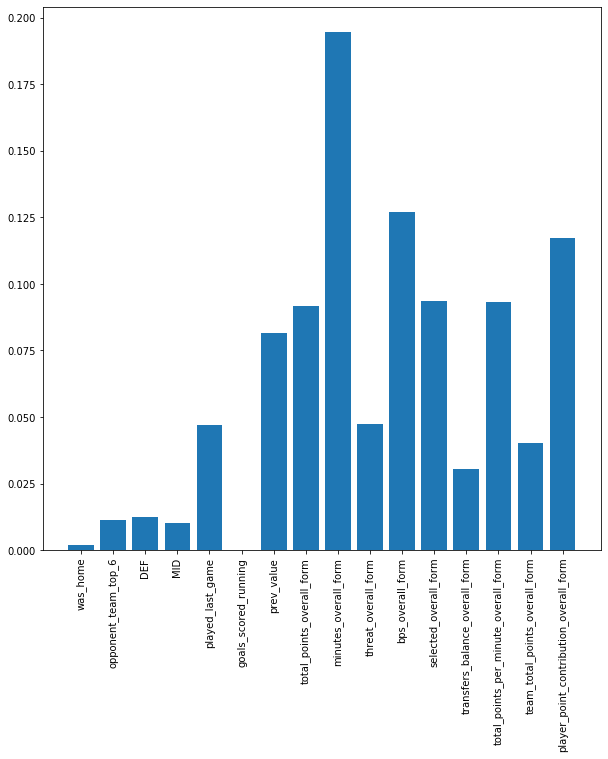

In [22]:
# Import Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

# train test split
# X_train, X_test, Y_train, Y_test = train_test_split(
#     balanced_features.values,
#     balanced_labels.values.reshape(-1),
#     test_size=0.2,
#     random_state=42)

split = StratifiedShuffleSplit(n_splits=5, test_size=0.25, random_state=42)

for train_index, test_index in split.split(balanced_features.values, balanced_labels.values.reshape(-1)):
    X_train, X_test = balanced_features.values[train_index], balanced_features.values[test_index]
    Y_train, Y_test = balanced_labels.values.reshape(-1)[train_index], balanced_labels.values.reshape(-1)[test_index]
    
from collections import Counter
#print(Counter(Y_train))
#print(Counter(Y_test))

# Print Baseline Accuracy
baseline_error = np.sum(Y_train == 2) / len(X_train)
print("baseline accuracy: " + str(100 * baseline_error) + "%")

# Train Model
rf = RandomForestClassifier(random_state=42,
                            max_depth=4,
                            n_estimators=2000,
                            max_features="auto")

rf.fit(X_train, Y_train)

# Print train accuracy
rf_train_predictions = rf.predict(X_train)
rf_train_accuracy = np.sum(Y_train == rf_train_predictions) / len(X_train)
print("rf train accuracy: " + str(100 * rf_train_accuracy) + "%")

# Print test accuracy
rf_test_predictions = rf.predict(X_test)
rf_test_accuracy = np.sum(Y_test == rf_test_predictions) / len(X_test)
print("rf test accuracy: " + str(100 * rf_test_accuracy) + "%")

# Feature importance
plt.figure(figsize=(10,10))
imp = rf.feature_importances_
plt.bar(features.columns, imp);
plt.xticks(rotation="vertical");

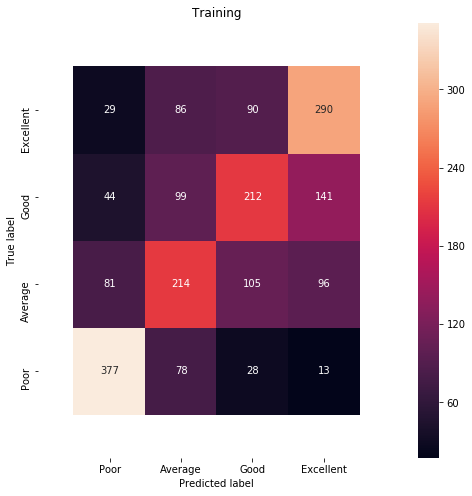

In [23]:
import seaborn as sn
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_train, rf_train_predictions)
cm_df = pd.DataFrame(cm, index=label_names, columns=label_names)

plt.figure(figsize=(8, 8))
sn.heatmap(cm_df, annot=True, fmt="d", robust=True)
plt.ylim(-0.5, 4.5);
plt.xlim(-0.5, 4.5);
plt.ylabel('True label');
plt.xlabel('Predicted label');
plt.title("Training");

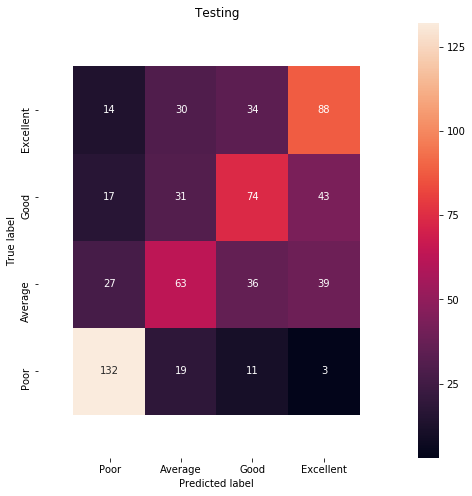

In [24]:
import seaborn as sn
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, rf_test_predictions)
cm_df = pd.DataFrame(cm, index=label_names, columns=label_names)

plt.figure(figsize=(8,8));
sn.heatmap(cm_df, annot=True, fmt="d");
plt.ylim(-0.5,4.5);
plt.xlim(-0.5,4.5);
plt.ylabel('True label');
plt.xlabel('Predicted label');
plt.title("Testing");

## Visualise Data